## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Model_train/onlinefoods.csv')
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

## Food Orders based on the Age

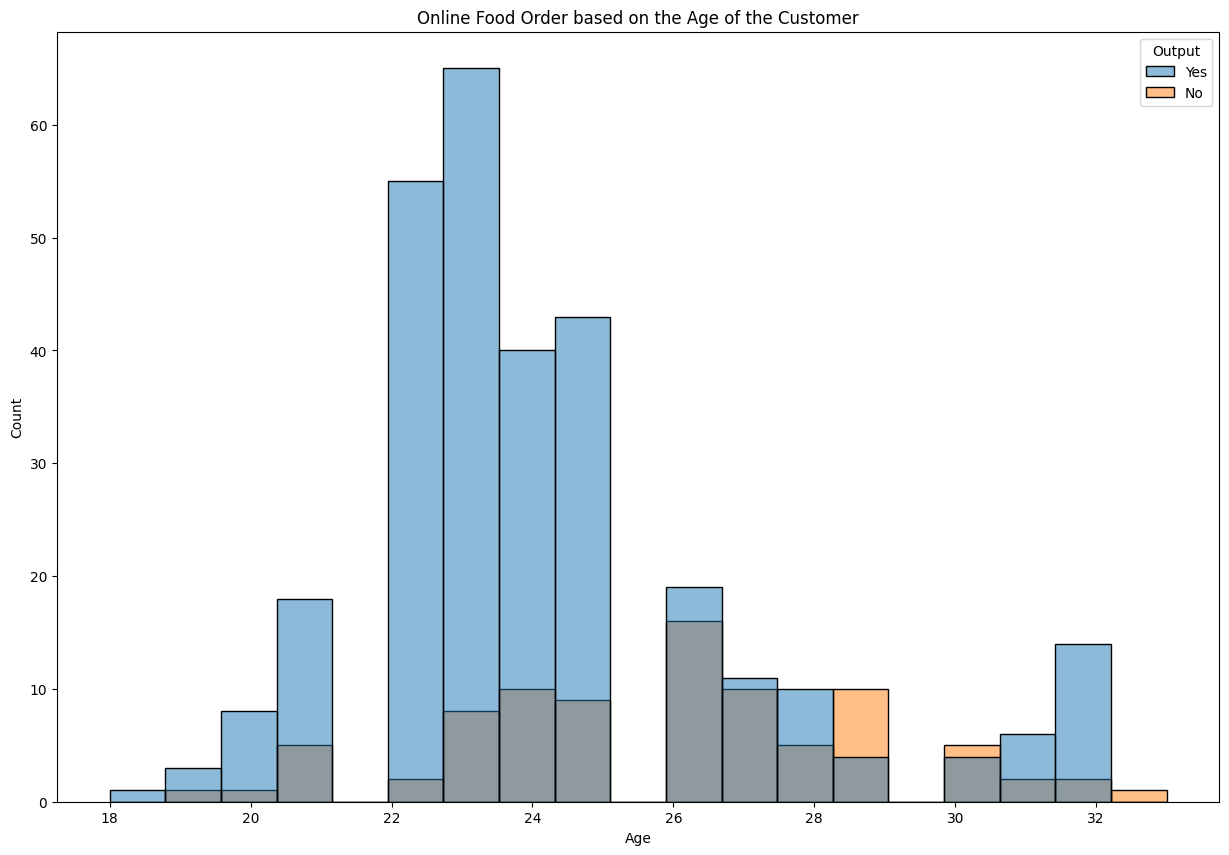

In [8]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=data)
plt.show()

Only 22 - 25 Age group has the highest orders, They are the target of online food delivery companies.

We can plot food order decisions based on the size of the family of the customer

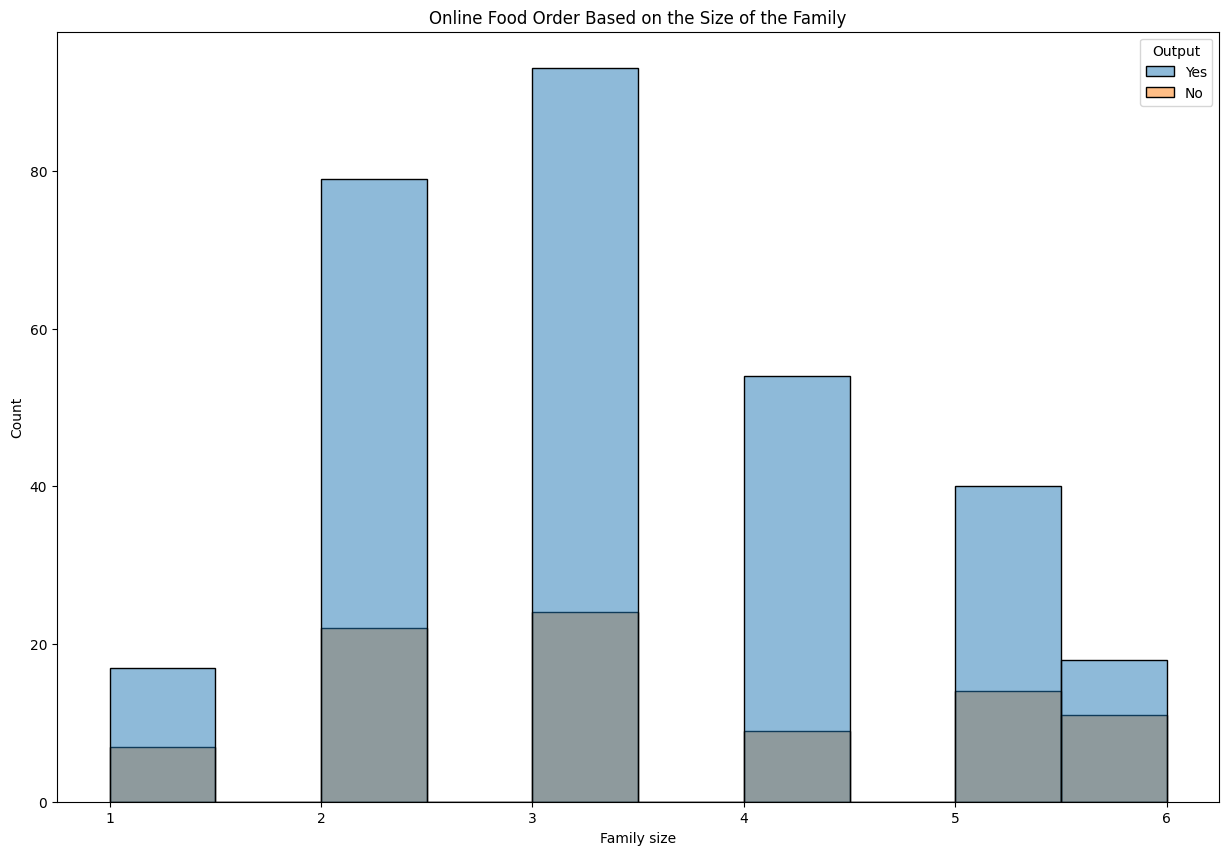

In [9]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=data)
plt.show()

Families with 2 and 3 members are ordering food often.
They can be roommates, couples, or a family of three.

In [12]:
frequent_data = data.query("Output == 'Yes'")
frequent_data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


Who ordered the most (Male / Female)

In [13]:
gender = frequent_data["Gender"].value_counts()
gender

Gender
Male      175
Female    126
Name: count, dtype: int64

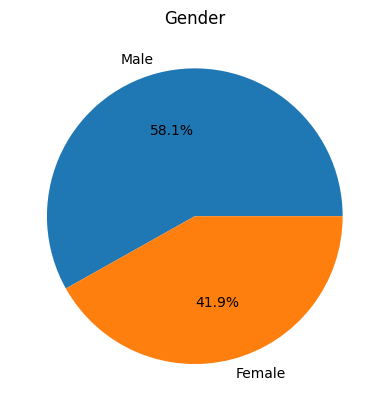

In [20]:
plt.pie(gender, labels=gender.index, autopct='%1.1f%%')
plt.title("Gender")
plt.show()

Major orders are done by men

Lets plot with Marital Status

In [23]:
marital_status = frequent_data['Marital Status'].value_counts()
marital_status

Marital Status
Single               229
Married               66
Prefer not to say      6
Name: count, dtype: int64

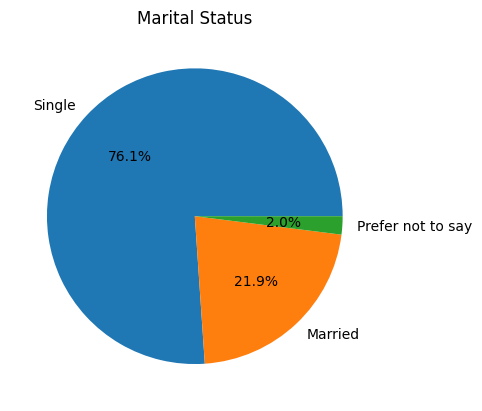

In [24]:
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%')
plt.title("Marital Status")
plt.show()

76% orders are done by Singles

21% orders are done by Married Couples

Now lets plot the income based orders

In [36]:
occupation = frequent_data['Occupation'].value_counts()
occupation

Occupation
Student           184
Employee           76
Self Employeed     34
House wife          7
Name: count, dtype: int64

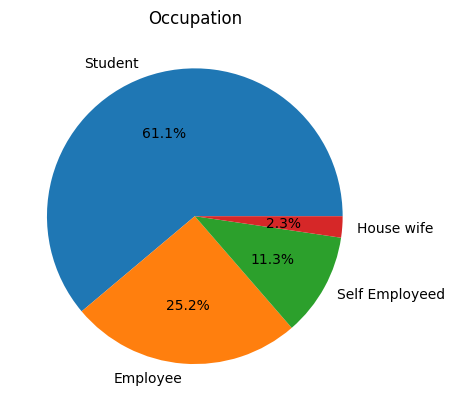

In [37]:
plt.pie(occupation, labels=occupation.index, autopct='%1.1f%%')
plt.title("Occupation");

The major orders are done by students.

Second highest orders are done by Employees.

Third highest orders are done by self - employees.

Least orders are done by House - wives


In [26]:
income = frequent_data['Monthly Income'].value_counts()
income

Monthly Income
No Income          164
More than 50000     44
25001 to 50000      42
10001 to 25000      32
Below Rs.10000      19
Name: count, dtype: int64

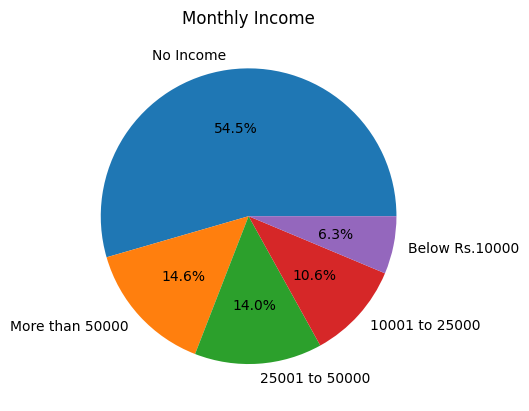

In [30]:
plt.pie(income, labels=income.index, autopct='%1.1f%%')
plt.title("Monthly Income");

Looks 54.5% of orders are done by people who have no income (ex. Students, House wives etc)

Below 10000 earning customers have ordered below 6%
  
10000 to 25000 earning customers have ordered around 10%

25000 to 50000 earning customers have ordered around 14%

50000 or above earning customers have ordered around 14%

Convert the Categorical values into Numerical Values for model training


In [31]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2,
                                                     "Single": 1,
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1,
                                             "Employee": 2,
                                             "Self Employeed": 3,
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1,
                                                                             "Post Graduate": 2,
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0,
                                                     "25001 to 50000": 5000,
                                                     "More than 50000": 7000,
                                                     "10001 to 25000": 25000,
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

In [32]:
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,1,1,0,2,2,12.9766,77.5993,560001,Yes,1,Yes
384,23,0,1,1,0,2,4,12.9854,77.7081,560048,Yes,1,Yes
385,22,0,1,1,0,2,5,12.9850,77.5533,560010,Yes,1,Yes
386,23,1,1,1,10000,2,2,12.9770,77.5773,560009,Yes,1,Yes


Lets create a Prediction model using Random Forest Classifier"


In [33]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation",
                   "Monthly Income", "Educational Qualifications",
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [35]:
# training a machine learning model
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

<ipython-input-35-97d0e0a942d3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


0.9487179487179487


In [38]:
import joblib
filename = 'model.pkl'
joblib.dump(model, open(filename, 'wb'))

In [39]:
load_model = joblib.load(open('model.pkl', 'rb'))
pred = load_model.predict(xtest)

In [40]:
pred

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes'], dtype=object)

In [ ]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
age = int(input("Enter the Age of the Customer: "))
gender = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
marital_status = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
occupation = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
income = int(input("Monthly Income: "))
edu_qual = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
familysize = int(input("Family Size: "))
pincode = int(input("Pin Code: "))
review = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[age, gender, marital_status, occupation, income, edu_qual, familysize, pincode, review]])
print("Finding if the customer will order again: ", model.predict(features))